# Data Modeling

## Spotify Challenge

<div><img style="width: 100%; " src="https://upload.wikimedia.org/wikipedia/commons/1/14/Iyyaka_Nastain_QR-Code_Spotify_Black.png" /></div>

## Background

In this project, we'll analyze some popular songs from Spotify. The dataset contains a number of variables that describe the songs, which we'll use to predict which genre it belongs to. 

Download the dataset [from Kaggle](https://www.kaggle.com/insiyeah/musicfeatures) (`data.csv`) and read it. You should start by performing basic EDA on it. Afterwards, follow the requirements.

In [1]:
!pip install — upgrade — force-reinstall — no-deps kaggle
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d insiyeah/musicfeatures

  0% 0.00/291k [00:00<?, ?B/s]
100% 291k/291k [00:00<00:00, 27.9MB/s]


In [ ]:
!mkdir data
! unzip musicfeatures.zip -d data

Archive:  musicfeatures.zip
  inflating: data/data.csv           
  inflating: data/data_2genre.csv    


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("data/data.csv")

In [ ]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


# EDA

Calculating the number of songs by genre

In [ ]:
df.groupby("label")["label"].count()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

The tempo of a piece of music is the speed of the underlying beat. Like a heartbeat, it can also be thought of as the 'pulse' of the music. Tempo is measured in BPM (beats per minute
), or beats per minute. One beat every second is 60 BPM.

Find the average tempo for each genre

We can see from the image below that reggae has the highest tempo and Country music has the lowest which is expected

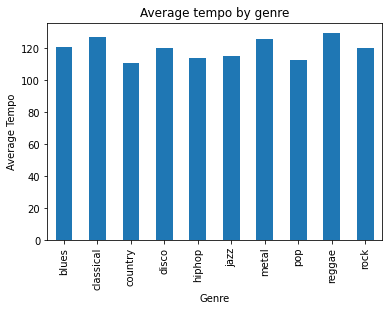

In [ ]:
tempo = df.groupby('label')["tempo"].mean()
tempo.plot.bar()
plt.title('Average tempo by genre')
plt.xlabel('Genre')
plt.ylabel('Average Tempo')
plt.show()

Correlation heatmap

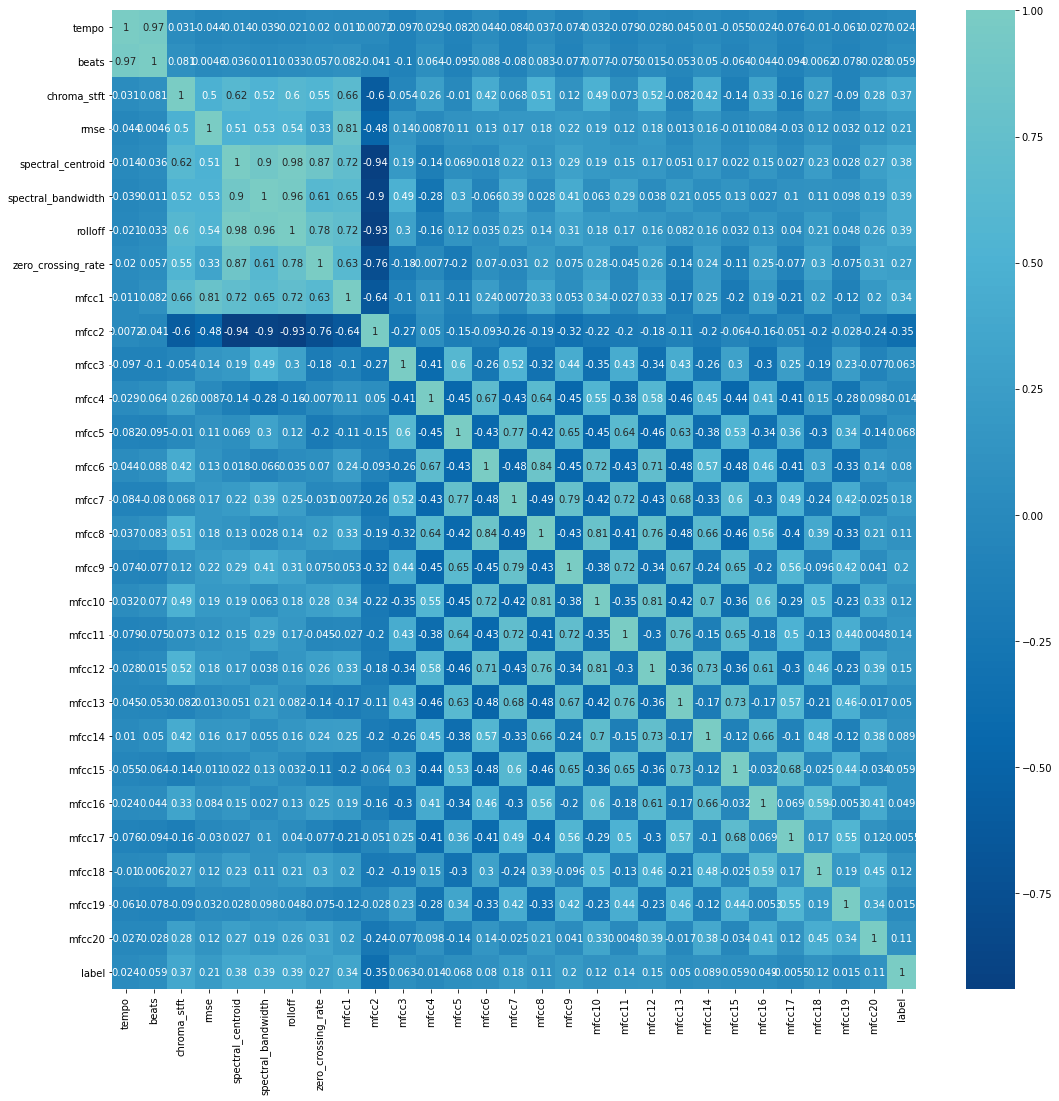

In [ ]:
correlations = df.corr()

fig = plt.figure(figsize=(18, 18))
sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)

# Data preprocessing

**Label Encoding** 

This helps to convert the categorical column "label" to numerical value and it involves converting each value in a column to a number.

In [ ]:
labelencoder = LabelEncoder()
df['label'] = labelencoder.fit_transform(df['label'])

df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,0
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,0
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,0
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,0
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,0


**Feature Scaling**

Variables/Features/Columns that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus to deal with this problem StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In [ ]:
X = df.drop(['label','filename'], axis=1)
y = df.label

In [ ]:
# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
scaled_df = scaler.fit_transform(X)

**Principal Component Analysis (PCA)**

PCA helps to reduce the dimension of the data by extracting the variables and leave the variables that has least information 

In [ ]:
pca = PCA()
pca_df = pca.fit_transform(scaled_df)

# putting in a dataframe
pca_df = pd.DataFrame(pca_df)

pca_df.head()
# pca_df.round(2).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,4.026954,-0.608237,0.566733,-1.051288,0.803557,1.805054,-0.594369,0.497099,1.422878,-0.040680,0.395722,1.132667,0.022857,0.459342,-0.154037,-0.479245,0.245588,-0.255550,0.021973,0.285180,-0.568445,0.111182,0.121680,0.355628,0.053504,-0.045990,0.132011,-0.046542
1,-2.288697,-2.084000,-2.340752,-0.889808,-1.537856,0.361693,-0.629180,-0.809791,0.599499,0.809037,-1.115804,-0.805259,0.030906,1.051749,0.668098,0.373379,0.617606,-0.455541,-0.434637,-0.904316,0.364742,1.313571,-0.526466,-0.374723,-0.210162,0.082129,-0.026826,-0.038148
2,-0.304840,-4.848809,5.835976,0.638215,-1.858788,-1.335609,0.216848,1.977659,0.537972,1.309263,0.399660,-0.686247,-1.511190,0.434149,-0.162827,-1.674264,0.452821,0.267661,-0.099431,-0.244073,0.177201,0.441174,0.036943,0.339829,-0.229172,-0.179737,0.129087,-0.017619
3,-1.202617,-3.200435,1.346796,3.068770,-1.568630,0.593284,-0.582738,-0.776217,0.174010,0.932488,-1.499740,-0.230342,0.941562,1.453455,0.803036,0.138572,0.485133,-0.583420,0.875812,-0.652945,-0.052080,0.697879,-0.178184,-0.227950,0.199159,0.039651,0.010433,-0.054612
4,1.258426,-0.904788,0.054734,1.670181,-1.346010,-0.122401,-1.067910,-0.323975,-1.400552,0.226419,0.184328,-0.003099,-0.357900,0.220251,-0.037222,0.740047,-0.231422,-0.154432,-0.482430,0.380107,-0.088341,0.068710,-0.107941,0.148225,-0.111913,0.203575,0.012285,-0.030198


In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance.round(2)

array([0.3 , 0.24, 0.1 , 0.07, 0.06, 0.03, 0.03, 0.03, 0.02, 0.02, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
pca_component_variance = PCA().fit(scaled_features)
plt.plot(np.cumsum(pca_component_variance.explained_variance_ratio_))

plt.rcParams["figure.figsize"] = (9,7)
plt.title('PCA variance percentage')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [ ]:
pca = PCA(n_components=21)
new_pca_df = pca.fit_transform(scaled_df)


new_pca_df = pd.DataFrame(new_pca_df, columns=['PC 1', 'PC 2','PC 3', 'PC 4', 'PC 5', 'PC 6', 
                                                              'PC 7', 'PC 8','PC 9','PC 10', 'PC 11', 'PC 12', 
                                                              'PC 13', 'PC 14', 'PC 15','PC 16','PC 17', 'PC 18',
                                                              'PC 19','PC 20', 'PC 21'])
new_pca_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,PC 21
0,4.026954,-0.608237,0.566733,-1.051288,0.803557,1.805054,-0.594369,0.497099,1.422878,-0.040680,0.395722,1.132667,0.022857,0.459342,-0.154037,-0.479245,0.245588,-0.255550,0.021973,0.285180,-0.568445
1,-2.288697,-2.084000,-2.340752,-0.889808,-1.537856,0.361693,-0.629180,-0.809791,0.599499,0.809037,-1.115804,-0.805259,0.030906,1.051749,0.668098,0.373379,0.617606,-0.455541,-0.434637,-0.904316,0.364742
2,-0.304840,-4.848809,5.835976,0.638215,-1.858788,-1.335609,0.216848,1.977659,0.537972,1.309263,0.399660,-0.686247,-1.511190,0.434149,-0.162827,-1.674264,0.452821,0.267661,-0.099431,-0.244073,0.177201
3,-1.202617,-3.200435,1.346796,3.068770,-1.568630,0.593284,-0.582738,-0.776217,0.174010,0.932488,-1.499740,-0.230342,0.941562,1.453455,0.803036,0.138572,0.485133,-0.583420,0.875812,-0.652945,-0.052080
4,1.258426,-0.904788,0.054734,1.670181,-1.346010,-0.122401,-1.067910,-0.323975,-1.400552,0.226419,0.184328,-0.003099,-0.357900,0.220251,-0.037222,0.740047,-0.231422,-0.154432,-0.482430,0.380107,-0.088341


**Splitting the dataset into training and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_pca_df, y, test_size = 0.2, random_state=20)

# Modelling

With PCA

In [ ]:
%%time
# create an object of logistic regression
lr = LogisticRegression(max_iter=500)
# train the model
lr.fit(X_train, y_train)
# make the predictions on testing set 
y_pred = lr.predict(X_test)

# check accuracy of the model
print("Accuracy of Logistic Regression model is:", accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 58.5
CPU times: user 116 ms, sys: 17 µs, total: 116 ms
Wall time: 120 ms


Without PCA

In [ ]:
%%time
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_df, y, test_size = 0.2, random_state=20)

# create an object of logistic regression
lr = LogisticRegression(max_iter=500)
# train the model
lr.fit(X_train2, y_train2)
# make the predictions on testing set 
y_pred2 = lr.predict(X_test2)

# check accuracy of the model
print("Accuracy of Logistic Regression model is:", accuracy_score(y_test2, y_pred2)*100)

Accuracy of Logistic Regression model is: 61.5
CPU times: user 121 ms, sys: 1.65 ms, total: 123 ms
Wall time: 128 ms


We can see from the model above, logistic regression without PCA gives a better accuracy. The PCA is important because even though the model without it gave a better result, it helps to reduce computation time which is important in production

# KMeans

KMeans is for unsupervised learning, so the "label" column will not be used in the dataset.

In [ ]:
kmeans = KMeans(n_clusters=10,init='random')
kmeans.fit(new_pca_df)
Z = kmeans.predict(new_pca_df)

In [ ]:
for i in range(0,10):
    row = np.where(Z==i)[0]  # row in Z for elements of cluster i
    num = row.shape[0]       #  number of elements for each cluster
    print("cluster "+str(i))
    print(str(num)+" elements")
    print(df[Z == i].sample(5))

cluster 0
144 elements
             filename       tempo  beats  ...    mfcc19    mfcc20  label
15     blues.00068.au  161.499023     80  ... -4.402835  3.615349      0
920     rock.00080.au  117.453835     58  ... -4.376046  0.313054      9
640    metal.00015.au  172.265625     85  ... -7.643869  2.225926      6
251  country.00053.au   89.102909     43  ... -5.592495 -0.705732      2
201  country.00082.au  117.453835     57  ... -4.507777 -1.807112      2

[5 rows x 30 columns]
cluster 1
73 elements
               filename       tempo  beats  ...    mfcc19    mfcc20  label
181  classical.00075.au  117.453835     47  ... -0.062472  2.724356      1
176  classical.00080.au  143.554688     69  ...  2.622762  1.662480      1
170  classical.00003.au   71.777344     30  ...  2.334469  2.649742      1
159  classical.00012.au   95.703125     36  ...  1.159939  1.792782      1
158  classical.00095.au   86.132812     43  ... -3.421368 -0.746099      1

[5 rows x 30 columns]
cluster 2
140 element

We can see from the clustering that some of the similar songs clustered together but some didn't and that could be because using something like the first cluster, the songs have similar tempo and that could influence the clustering. 